<a href="https://colab.research.google.com/github/CAMI2-bit/SIMULACION-I/blob/main/EJERCICIO_BOX_MULLER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###BOX MULLER


#### EJERCICIO

Una flecha sera ensamblada enun cojinete

Si $x_1$ sigue una distribucion con media 1.5 y varianza 0.0016, y $x_2$ sigue esta misma distrubucion con media 1.48 y varianza 0.0009 determina la probabilidad
a) cuando hay interferencia
b) el numero de veces que sea necesario hacer simulaciones, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%

####PASO 1: Identifique las variables

\begin{equation}
x_1 \sim N(1.5 , 0.04)
\end{equation}

\begin{equation}
x_2 \sim N(1.48 , 0.03)
\end{equation}

####PASO 2: Determine la distribución de probabilidad

\begin{equation}
x_1 \thicksim f(x) = \frac{1}{\sqrt{2\pi}(0.04)} \, e^{-\frac{1}{2} \left( \frac{x - 1.5}{0.04} \right)^2}, \quad -\infty < x < \infty
\end{equation}

\begin{equation}
x_2 \thicksim f(x) = \frac{1}{\sqrt{2\pi}(0.003)} \, e^{-\frac{1}{2} \left( \frac{x - 1.48}{0.003} \right)^2}, \quad -\infty < x < \infty
\end{equation}


####PASO 3: BOX MULLER

Box-Muller convierte dos variables aleatorias uniformes  $U_1,U_2$  en dos variables normales independientes

####PASO 4: CONDICION DE INTERFERENCIA

\begin{equation}
x_1 \geq x_2
\end{equation}

Buscamos

\begin{equation}
P(x_1 \geq x_2)
\end{equation}

####PASO5:

n=10 cantidad de veces

Generar dos numeros aleatorios $(x_1 , x_2)$

In [1]:
#Librerias
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [2]:
def experimento(n=10):
  exitos = 0
  for i in range(n):
    x1 = np.random.normal(1.5,0.04,1)
    x2 = np.random.normal(1.48,0.03,1)
    if x2 > x1:
      exitos += 1
    prob = exitos/n
  return prob

####PASO 6:

Repetir M veces el experimento

In [15]:
def muestra (M):
  lista = []
  for i in range(M):
    e = experimento(i+1)
    lista.append(e)
  return lista


In [5]:
#Parámetros
mu_x1 = 1.5
sig_x1 = np.sqrt(0.0016)
mu_x2 = 1.48
sig_x2 = np.sqrt(0.0009)

a) La probabilidad de que haya interferencia

In [6]:
mu_D = mu_x2 - mu_x1
sigma_D = np.sqrt(sig_x1**2 + sig_x2**2)
prob_teorica = 1 - norm.cdf(0, loc=mu_D, scale=sigma_D)
print(f"Probabilidad teórica de interferencia: {prob_teorica:.4f}")

Probabilidad teórica de interferencia: 0.3446


b) El numero de veces que es necesario simular el experimeto, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%

In [7]:
z = 1.96
E = 0.01
n_simulaciones = int(np.ceil((z**2 * prob_teorica * (1 - prob_teorica)) / E**2))
print(f"Número de simulaciones necesarias: {n_simulaciones}")

Número de simulaciones necesarias: 8677


#### GRAFICAMOS

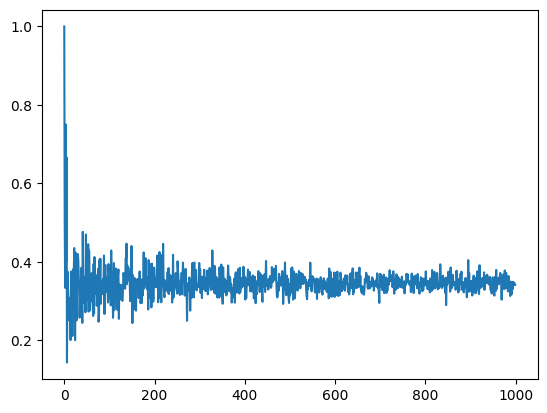

In [16]:
m = muestra(M=1000)
plt.plot(m)

# *Solución Analítica para el Problema de Interferencia*

## *Datos del Problema*
- $ x_1 \sim N(\mu_1, \sigma_1^2) = N(1.5, 0.0016) $
- $ x_2 \sim N(\mu_2, \sigma_2^2) = N(1.48, 0.0009) $



## *Paso 1: Probabilidad de Interferencia $ P(x_2 \geq x_1) $*

Definimos la variable diferencia:
$
D = x_2 - x_1
$

Como  $x_1 $ y $ x_2 $ son independientes:
$
D \sim N(\mu_D, \sigma_D^2)$

donde:

$
\mu_D = \mu_2 - \mu_1 = 1.48 - 1.5 = -0.02
$

$
\sigma_D^2 = \sigma_1^2 + \sigma_2^2 = 0.0016 + 0.0009 = 0.0025 \implies \sigma_D = 0.05
$

La probabilidad de interferencia es:

$
P(x_2 \geq x_1) = P(D \geq 0)
$

Estandarizamos $ D $:
$
Z = \frac{0 - \mu_D}{\sigma_D} = \frac{0 - (-0.02)}{0.05} = 0.4
$

Usando la tabla de la normal estándar:
$
P(Z \geq 0.4) = 1 - P(Z < 0.4) = 1 - 0.6554 = 0.3446
$

*Resultado:*
$
\boxed{P(x_2 \geq x_1) = 34.46\%}
$



## *Paso 2: Número de Simulaciones Necesarias*

Fórmula para el tamaño de muestra (proporciones):
$
n = \left( \frac{z \cdot \sqrt{p(1 - p)}}{E} \right)^2
$

Valores:
- $ p = 0.3446 $
- $ E = 0.01 $
- $ z = 1.96 $ (para 95% confianza)

Cálculos:
$
n = \left( \frac{1.96 \cdot \sqrt{0.3446 \cdot 0.6554}}{0.01} \right)^2 = 8676.285869 ≈ 8677
$

*Resultado:*
$
\boxed{n = 8677 \text{ simulaciones}}
$




